##### NAME:- SOMYA RANJAN SAHOO

# Car Price Prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics

In [2]:
# Load car data from a CSV file
car_dataset = pd.read_csv('C:/Users/Soumya/Desktop/Data Science/Oasis Infobyte/Task 3/car data.csv')

In [3]:
# Examine the first 5 rows of the dataset
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# Check the dimensions of the dataset
car_dataset.shape

(301, 9)

In [5]:
# Get an overview of the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# Check for missing values
car_dataset.isnull().sum()

In [6]:
# Check the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Selling_type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [7]:
# Encoding categorical columns
car_dataset.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
car_dataset.replace({'Selling_type': {'Dealer': 0, 'Individual': 1}}, inplace=True)
car_dataset.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

In [8]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [9]:
# Prepare the feature and target variables
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

In [12]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)

In [13]:
# Create a Linear Regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [27]:
# Predict on training data and calculate R-squared error
training_data_prediction = lin_reg_model.predict(X_train)
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error is ", error_score)

R squared Error is  0.8877622495837854


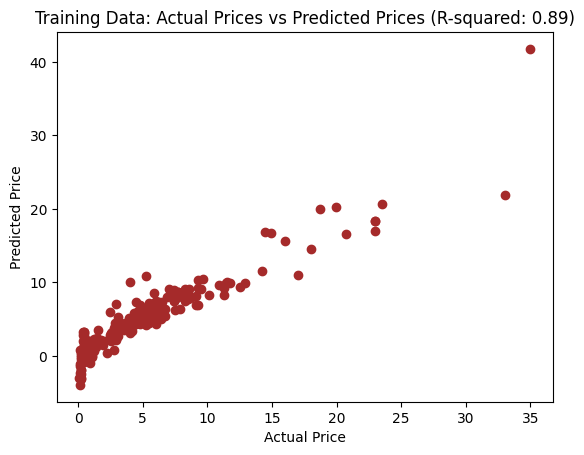

In [17]:
# Create a scatter plot for actual vs. predicted prices
plt.scatter(Y_train, training_data_prediction, c='brown')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Training Data: Actual Prices vs Predicted Prices (R-squared: {:.2f})".format(error_score))
plt.show()

In [26]:
# Predict on test data and calculate R-squared error
test_data_prediction = lin_reg_model.predict(X_test)
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error is ", error_score)

R squared Error is  0.7849843177647191


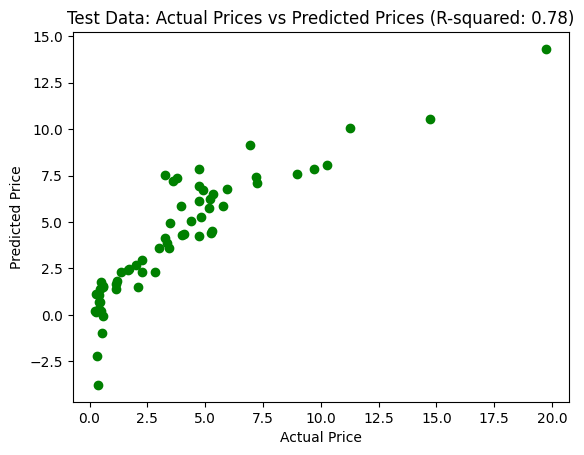

In [19]:
# Create a scatter plot for actual vs. predicted prices on the test set
plt.scatter(Y_test, test_data_prediction, c='green')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Test Data: Actual Prices vs Predicted Prices (R-squared: {:.2f})".format(error_score))
plt.show()

In [20]:
# Create a Lasso Regression model
lasso_reg_model = Lasso()
lasso_reg_model.fit(X_train, Y_train)

Lasso()

In [28]:
# Predict on training data and calculate R-squared error
training_data_prediction = lasso_reg_model.predict(X_train)
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error is ", error_score)

R squared Error is  0.8507290564124662


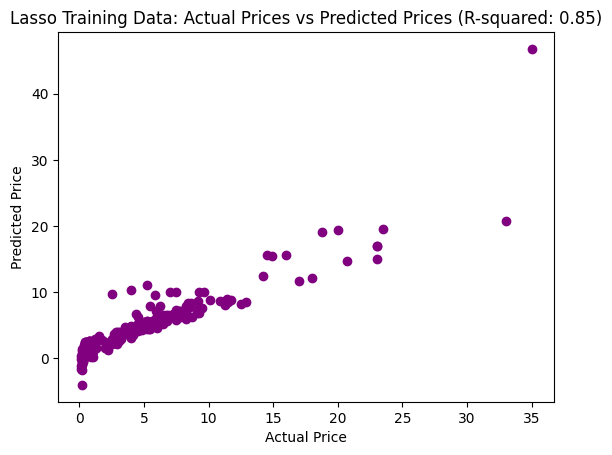

In [23]:
# Create a scatter plot for actual vs. predicted prices
plt.scatter(Y_train, training_data_prediction, c='purple')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Lasso Training Data: Actual Prices vs Predicted Prices (R-squared: {:.2f})".format(error_score))
plt.show()

In [29]:
# Predict on test data and calculate R-squared error
test_data_prediction = lasso_reg_model.predict(X_test)
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error is ", error_score)

R squared Error is  0.7703836303438533


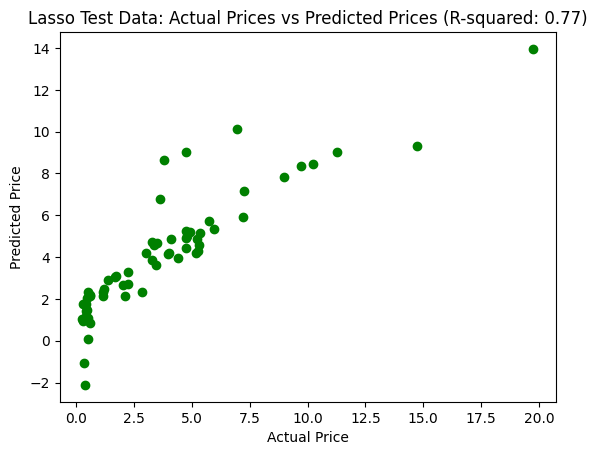

In [25]:
# Create a scatter plot for actual vs. predicted prices on the test set
plt.scatter(Y_test, test_data_prediction, c='green')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Lasso Test Data: Actual Prices vs Predicted Prices (R-squared: {:.2f})".format(error_score))
plt.show()